# 绘制montage图片

In [1]:
import os

In [2]:
dir_path = '/root/workspace/Helium-327-SegBrats/outputs/UNet3D_BN_best_ckpt@epoch107_diceloss0.1372_dice0.8838_16/P1'

p_name = os.path.basename(dir_path)
save_path = os.path.join(os.path.dirname(dir_path), f'{p_name}_roi')

os.makedirs(save_path, exist_ok=True)

In [3]:
import nilearn as nl
import nilearn.plotting as nlplt

In [4]:
file_list = os.listdir(dir_path)
file_list.sort()
file_list

['P1_test_input_flair.nii.gz',
 'P1_test_input_mask.nii.gz',
 'P1_test_input_t1.nii.gz',
 'P1_test_input_t1ce.nii.gz',
 'P1_test_input_t2.nii.gz',
 'P1_test_pred.nii.gz']

In [5]:
t1_name = f'{p_name}_test_input_t1.nii.gz'
t1ce_name = f'{p_name}_test_input_t1ce.nii.gz'
t2_name = f'{p_name}_test_input_t2.nii.gz'
flair_name = f'{p_name}_test_input_flair.nii.gz'
mask_name = f'{p_name}_test_input_mask.nii.gz'
pred_name = f'{p_name}_test_pred.nii.gz'


In [6]:
t1_path = os.path.join(dir_path, t1_name)
t1ce_path = os.path.join(dir_path, t1ce_name)
t2_path = os.path.join(dir_path, t2_name)
flair_path = os.path.join(dir_path, flair_name)
mask_path = os.path.join(dir_path, mask_name)
pred_path = os.path.join(dir_path, pred_name)

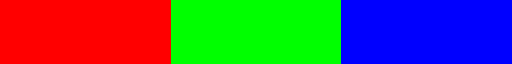

In [7]:
# 自定义一个颜色映射，将索引0映射为灰色，索引1映射为红色，索引2映射为绿色，索引3映射为紫色


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = [(1, 0, 0),  # 红色代表NCR 1
          (0, 1, 0),  # 绿色代表ED 水肿， 2
          (0, 0, 1)]  # 蓝色代表ET， 3

custom_cmap = ListedColormap(colors)

custom_cmap

In [8]:
# t1_img = nl.image.load_img(t1_path)
# t1ce_img = nl.image.load_img(t1ce_path)
# t2_img = nl.image.load_img(t2_path)
# flair_img = nl.image.load_img(flair_path)
# mask_img = nl.image.load_img(mask_path)
# pred_img = nl.image.load_img(pred_path)
import nibabel as nib
t1_img = nib.load(t1_path).get_fdata()
t1ce_img = nib.load(t1ce_path).get_fdata()
t2_img = nib.load(t2_path).get_fdata()
flair_img = nib.load(flair_path).get_fdata()
mask_img = nib.load(mask_path).get_fdata()
pred_img = nib.load(pred_path).get_fdata()
t1_img.shape


(240, 240, 154)

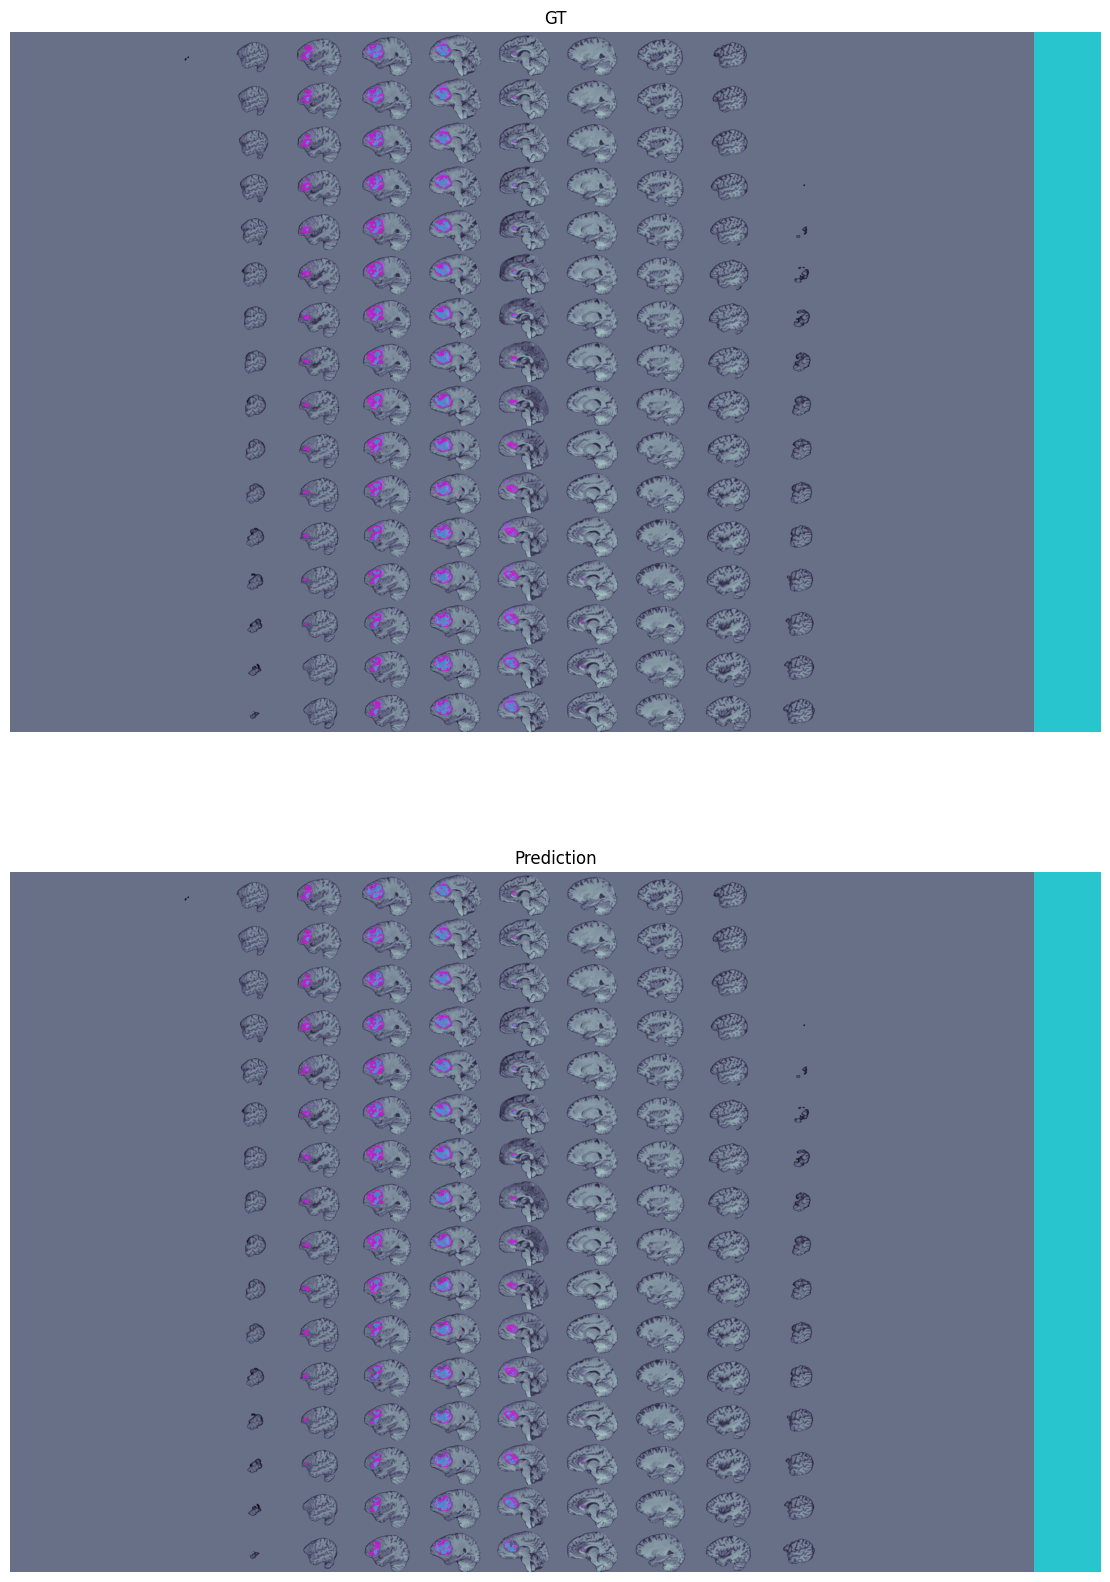

In [16]:
import numpy as np
from skimage.util import montage

img = np.rot90(montage(t1_img))
# mask = np.rot90(montage(seg_data))
mask = np.rot90(montage(mask_img))
# mask = np.clip(mask_img, 0, 3)

pred = np.rot90(montage(pred_img), axes=(0, 1))
# pred = np.clip(pred, 0, 3)

# cmap = custom_cmap
cmap = 'cool'
modal = 't1'
fig, ax1 = plt.subplots(2, 1, figsize=(40, 20))

ax1[0].imshow(img, cmap='bone')
ax1[0].imshow(np.ma.masked_where(mask == False, mask), cmap=cmap, alpha=0.6, animated=True)
ax1[0].set_title('GT')

ax1[1].imshow(img, cmap='bone')
ax1[1].imshow(np.ma.masked_where(pred == False, pred), cmap=cmap, alpha=0.6, animated=True)
ax1[1].set_title('Prediction')

for i in ax1:
    i.axis('off')
fig.savefig(os.path.join(save_path, f'{modal}_3d_to_2d.png'), format='png', bbox_inches='tight')
plt.show()